# Table of contents
[I. Introduction](#I.-Introduction)<br>
[1.1 Prepare data](#1.1-Prepare-data)<br>

[II. Exploring the Data](#II.-Exploring-the-Data)<br>
[2a. Statistical Overview](#2a.-Statistical-Overview)<br>
[2b. Correlation Matrix & Heatmap](#2b.-Correlation-Matrix-&-Heatmap)<br>
[2c. Statistical Test for Correlation](#2c.-Statistical-Test-for-Correlation)<br>
[2d. Distribution Plots (Satisfaction - Distance - Income)](#2d.-Distribution-Plots-(Satisfaction---Distance---Income))<br>
[2e. Department V.S. Attrition](#2e.-Department-V.S.-Attrition)<br>
[2f. Overtime V.S. Attrition](#2f.-Overtime-V.S.-Attrition)<br>
[2g. Statistical Test for Correlation (Satisfaction)](#2g.-Statistical-Test-for-Correlation-(Satisfaction))<br>

[III. Conclusions](#III.-Conclusions)<br>

[IV. References](#IV.-References)


# I. Introduction
[Dữ liệu phân tích nhân sự IBM](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) về độ hụt giảm (attrition) và khả năng làm việc trong công ty (performance)
Ở phần báo cáo này, chúng ta sẽ tập trung vào những câu hỏi quan trọng:
- Những nhân tố nào đang đóng vai trò trong tỷ lệ suy giảm?
- Những nhân tố nào đang đóng vao trò trong tỷ lệ hài lòng?
- Khi nào thì nhân viên bỏ đi?

Để giải quyết các câu hỏi này, thì notebook này sẽ bao gồm phần khám phá dữ liệu, minh họa, lọc dữ liệu,phân tích trên t-test/ f-test và đưa ra kết luận.

## 1.1 Prepare data

**Import những libraries cần thiết và tải dữ liệu**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

**Load dữ liệu csv**

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Check missing value**

In [3]:
# Check to see if there are any missing values in our data set
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dữ liệu không có missing value

Đổi tên một số cột để quan sát dữ liệu được tốt hơn. Chuyển những feature phụ thuộc "Attrition" và "Satisfaction" sang hàng đầu

In [4]:
# Renaming certain columns for better readability
df = df.rename(columns={"DistanceFromHome" : "Distance",
                       "MonthlyIncome": "Income",
                       "PerformanceRating":"Evaluation",
                       "JobSatisfaction" : "Satisfaction"})

In [5]:
# Move the reponse variable "Attrition" and "Satisfaction" to the front of the table
first = df['Attrition']
second = df["Satisfaction"]
df.drop(labels=['Attrition'], axis=1,inplace = True)
df.drop(labels=['Satisfaction'], axis=1,inplace = True)
df.insert(0, 'Attrition', first)
df.insert(1, 'Satisfaction', second)
df.head()

,Attrition,Satisfaction,Age,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,4,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,No,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,Yes,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,No,3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,No,2,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Quan sát thấy dữ liệu có **1470** hàng, mỗi hàng tương ứng với một nhân viên. Trong đó những người có chiều hướng nghỉ là 237 chiếm **16.12%** tổng nhân sự.

Label encode output "Attrition". Đây là feature chúng ta quan tâm

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head(3)

,Attrition,Satisfaction,Age,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,4,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,0,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0


In [9]:
# Với encode 0 và 1 tương ứng
list(le.inverse_transform([0,1]))

['No', 'Yes']

# II. Exploring the Data

## 2a. Statistical Overview

In [10]:
# The dataset contains 35 columns and 1470 observations
df.shape

(1470, 35)

Dữ liệu có 1470 nhân viên và 35 features

In [11]:
# Looks like about 83.9% of employees stayed and 16.1% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
attrition_rate = df["Attrition"].value_counts() / len(df)
attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

Tỷ lệ nhân viên ra đi là **16.1%**

Theo cảm quan ta chọn ra một số features có thể ảnh hưởng đến Attrition và Satisfaction

- Age (tuổi)
- Distance (khoảng đường đi từ nhà đến chỗ làm)
- Gender (giới tính)
- Income (lương tháng)
- Evaluation (đánh giá hiệu quả làm việc)
- OverTime (làm quá giờ)
- YearsAtCompany(số năm làm việc tại công ty)
- Department (nhóm ngành)

In [12]:
new_df = df[["Attrition", "Satisfaction","Age","Distance","Gender", "Income",\
            "Evaluation", "OverTime", "YearsAtCompany", "Department" ]]

In [13]:
# Display the statistical overview of the employees (category values)
new_df.describe(include='O')

,Gender,OverTime,Department
count,1470,1470,1470
unique,2,2,3
top,Male,No,Research & Development
freq,882,1054,961


Khoảng hơn 1 nửa nhân viên là **nam**<br>
Hầu như nhân viên **không làm OT**<br>
Nhóm ngành của nhân viên làm chủ yếu là trong **ngành R&D: nghiên cứu và phát triển**

In [14]:
# Display the statistical overview of the employees (numerical values)
new_df.describe()

,Attrition,Satisfaction,Age,Distance,Income,Evaluation,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,2.728571,36.923810,9.192517,6502.931293,3.153741,7.008163
std,0.367863,1.102846,9.135373,8.106864,4707.956783,0.360824,6.126525
min,0.000000,1.000000,18.000000,1.000000,1009.000000,3.000000,0.000000
25%,0.000000,2.000000,30.000000,2.000000,2911.000000,3.000000,3.000000
50%,0.000000,3.000000,36.000000,7.000000,4919.000000,3.000000,5.000000
75%,0.000000,4.000000,43.000000,14.000000,8379.000000,3.000000,9.000000
max,1.000000,4.000000,60.000000,29.000000,19999.000000,4.000000,40.000000


Độ thỏa mãn trung bình của nhân viên là **2.73** (chấm theo thang từ 1 đến 4, trong đó 1 là low và 4 là very high)<br>
Đánh giá dữ liệu không có gì bất thường (qua mean, min, max, 50%).

In [15]:
# Overview of summary (Attrition V.S. Non-attrition)
attrition_Summary = new_df.groupby('Attrition')
attrition_Summary.mean()

,Satisfaction,Age,Distance,Income,Evaluation,YearsAtCompany
Attrition,,,,,,
0,2.778589,37.561233,8.915653,6832.739659,3.153285,7.369019
1,2.468354,33.607595,10.632911,4787.092827,3.156118,5.130802


Sau khi đánh giá sơ bộ về những người mang độ hụt giảm (attrition = Yes) và những người không có (attrition = No). Nhìn vào số liệu:
- Độ thỏa mãn về công việc của người ở lại cao hơn người ra đi.
- Độ tuổi càng cao thì nhân viên ít muốn nghỉ việc hơn.
- Quãng đường từ nhà đến chỗ làm càng xa, thì nhân viên dễ ra đi hơn.
- Những người ra đi, nhận mức lương (tháng) thấp hơn.
- Mức đánh giá của người ra đi và người ở lại tương đương nhau -> có thể drop cột này đi.
- Nhân viên làm lâu năm ở công ty thì họ muốn tiếp tục gắn bó hơn là ra đi.

## 2b. Correlation Matrix & Heatmap

Các cột như Attrition, Satisfaction, Department, Gender, OverTime, Evaluation là loại dữ liệu category nên không thể dùng ma trận tương quan.<br>
Ta dùng những cột còn lại là loại dữ liệu liên tục để phân tích tính tương quan giữa các features khác nhau.

,Age,Distance,Income,YearsAtCompany
Age,1.000000,-0.001686,0.497855,0.311309
Distance,-0.001686,1.000000,-0.017014,0.009508
Income,0.497855,-0.017014,1.000000,0.514285
YearsAtCompany,0.311309,0.009508,0.514285,1.000000


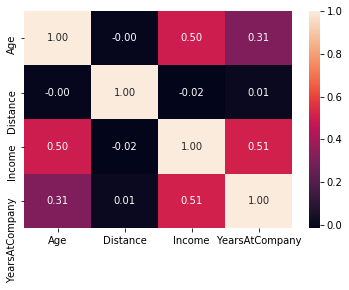

In [16]:
#Correlation Matrix
new_df1 = new_df[['Age', 'Distance', 'Income', 'YearsAtCompany']]
corr = new_df1.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True, fmt=".2f")

corr

Những mối tương quan đồng biến:
- Income vs Age: **0.5**
- Income vs YearsAtCompany: **0.51**
- Age vs YearsAtCompany: **0.31**

Các features này có mối tương quan đồng biến trung bình.<br>
Vì có những mối tương quan đồng biến trên nên ta kết luận được:
- Nhân viên lớn tuổi thì lương cao hơn.
- Thâm niên cao thì lương cao hơn.
- Nhân viên lớn tuổi gắn bó với công ty hơn.

## 2c. Statistical Test for Correlation

Pop1: những người ra đi<br>
Pop2: những người ở lại

Đây là 2 samples độc lập nên ta dùng **Independent Samples T-Test**

**Hypothesis Testing 01:** Liệu có sự khác biệt về mức độ thỏa mãn(satisfaction) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no)?<br>
- **Null Hypothesis (H0)**: Mức độ thỏa mãn giữa những người ra đi và những người ở lại là bằng nhau
- **Alternate Hypothesis (H1):** Có sự khác biệt về mức độ thỏa mãn giữa những người ra đi và những người ở lại

Chọn alpha =0.05 (với mức tin cậy 95%)

In [66]:
import scipy.stats as stats
result = stats.ttest_ind(df[df["Attrition"]==1]['Satisfaction'],
                               df[df["Attrition"]==0]['Satisfaction'])
result

Ttest_indResult(statistic=-3.9862267630568273, pvalue=7.043066741731151e-05)

In [67]:
alpha = 0.05
def compare_pvalue(n):
    """So sánh t của result và t critical rồi đưa ra kết luận"""
    if n.pvalue < alpha:
        print("Reject H0")
    else:
        print("Không có cơ sở để bác bỏ H0. Chấp nhận H0 với mức ý nghĩa", n.pvalue)

In [68]:
compare_pvalue(result) #check

Reject H0


**Kết luận:** Có sự khác biệt trong sự thỏa mãn công việc giữa người ra đi và người ở lại. Cụ thể: người ra đi thì có mức độ thỏa mãn thấp hơn những người ở lại (t statistic < 0), với mức tin cậy >95%

**Hypothesis Testing 02:** Liệu có sự khác biệt về quãng đường đi làm (distance) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no)?<br>
- **Null Hypothesis (H0)**: Quãng đường đi làm giữa những người ra đi và những người ở lại là bằng nhau.
- **Alternate Hypothesis (H1):** Có sự khác biệt về quãng đường đi làm giữa những người ra đi và những người ở lại

In [69]:
result = stats.ttest_ind(df[df["Attrition"]==1]['Distance'],
                               df[df["Attrition"]==0]['Distance'])
result

Ttest_indResult(statistic=2.994708098265125, pvalue=0.0027930600802134266)

In [70]:
compare_pvalue(result) #check

Reject H0


**Kết luận:** Có sự khác biệt về khoảng cách từ nhà đến nơi làm giữa những người ra đi và những người ở lại. Cụ thể khoảng cách từ nhà đến nơi làm của người muốn ra đi thì xa hơn (t statistic >0), với độ tin cậy >95%

**Hypothesis Testing 03**: Liệu có sự khác biệt về tiền lương (Income) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no):

- Null Hypothesis (H0): Tiền lương giữa những người ra đi và những người ở lại là bằng nhau.
- Alternate Hypothesis (H1): Có sự khác biệt về tiền lương giữa những người ra đi và những người ở lại

In [71]:
result = stats.ttest_ind(df[df["Attrition"]==1]['Income'],
                               df[df["Attrition"]==0]['Income'])
result

Ttest_indResult(statistic=-6.203935765608938, pvalue=7.14736398535381e-10)

In [72]:
compare_pvalue(result) #check

Reject H0


**Kết luận**: Có sự khác biệt về tiền lương giữa những người ra đi và những người ở lại. Cụ thể tiền lương của người ra đi thì thấp hơn (t statistic <0), với độ tin cậy >95%

**Hypothesis Testing 04**: Liệu có sự khác biệt về độ tuổi (Age) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no):

- Null Hypothesis (H0): Tuổi giữa những người ra đi và những người ở lại là bằng nhau.
- Alternate Hypothesis (H1): Có sự khác biệt về tuổi giữa những người ra đi và những người ở lại

In [73]:
result = stats.ttest_ind(df[df["Attrition"]==1]['Age'],
                               df[df["Attrition"]==0]['Age'])
result

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)

In [74]:
compare_pvalue(result) #check

Reject H0


**Kết luận**: Có sự khác biệt về tuổi giữa những người ra đi và những người ở lại. Cụ thể tuổi của người ra đi thì trẻ hơn người ở lại (t statistic <0), với độ tin cậy >95%

**Hypothesis Testing 05**: Liệu có sự khác biệt về thâm niên (YearsAtCompany) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no):

- Null Hypothesis (H0): Thâm niên giữa những người ra đi và những người ở lại là bằng nhau.
- Alternate Hypothesis (H1): Có sự khác biệt về thâm niên giữa những người ra đi và những người ở lại

In [75]:
result = stats.ttest_ind(df[df["Attrition"]==1]['YearsAtCompany'],
                               df[df["Attrition"]==0]['YearsAtCompany'])
result

Ttest_indResult(statistic=-5.1963086670254235, pvalue=2.3188716103863033e-07)

In [76]:
compare_pvalue(result) #check

Reject H0


**Kết luận**: Có sự khác biệt về thâm niên giữa những người ra đi và những người ở lại. Cụ thể thâm niên của người ra đi thì thấp hơn người ở lại (t statistic <0), với độ tin cậy >95%

**Hypothesis Testing 06**: Liệu có sự khác biệt về đánh giá năng lực (Evaluation) giữa những nhân viên ra đi (attrition = yes) và những nhân viên ở lại (attrition = no):

- Null Hypothesis (H0): Đánh giá năng lực giữa những người ra đi và những người ở lại là bằng nhau. 
- Alternate Hypothesis (H1): Có sự khác biệt về đánh giá năng lực giữa những người ra đi và những người ở lại

In [77]:
result = stats.ttest_ind(df[df["Attrition"]==1]['Evaluation'],
                               df[df["Attrition"]==0]['Evaluation'])
result

Ttest_indResult(statistic=0.11068150493295091, pvalue=0.9118840421069003)

In [78]:
compare_pvalue(result) #check

Không có cơ sở để bác bỏ H0. Chấp nhận H0 với mức ý nghĩa 0.9118840421069003


**Kết luận**: đánh giá về năng lực của người ra đi và ở lại là bằng nhau với mức ý nghĩa **91.2%**<br>
-> vậy đây không phải là yếu tố đóng vai trò trong attrition rate.

## 2d. Distribution Plots (Satisfaction - Distance - Income)

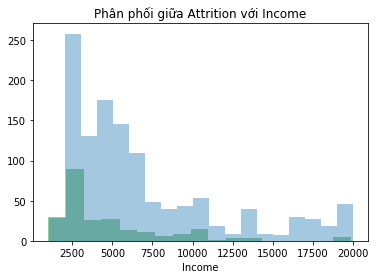

In [79]:
plt.title('Phân phối giữa Attrition với Income')
sns.distplot(df[df["Attrition"]==1]['Income'], color="g", kde=False);
sns.distplot(df[df["Attrition"]==0]['Income'], kde=False)

Hầu hết những người ra đi, có mức thu nhập ở mức **2500** tức là thấp hơn mức thu nhập trung vị median **4919**. Điều này khá dễ hiểu, trả lương thấp thì người lao động muốn chuyển sang chỗ khác làm.<br>
Nhưng vẫn có những người được trả lương cao, ở top đầu gần **20.000** vẫn muốn nghỉ. Vậy lý do ở đây là gì? Có thể vì áp lực công việc hoặc những người này nghĩ rằng họ có thể phát triển tiếp ở những nơi tốt hơn chăng?

In [1]:
plt.title('Phân phối giữa Attrition với Distance')
sns.distplot(df[df["Attrition"]==1]['Distance'], color="g", kde=False);
sns.distplot(df[df["Attrition"]==0]['Distance'], kde=False)

NameError: name 'plt' is not defined

Theo đồ thị thì ta thấy những người đi làm càng xa thì khả năng họ xin nghỉ càng cao. Cá biệt ở Distance từ **10-15 và 20-25** thì nhân viên nghỉ còn cao hơn cả nhân viên ở lại.

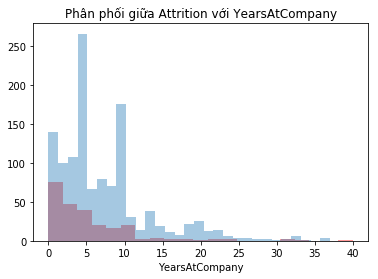

In [81]:
plt.title('Phân phối giữa Attrition với YearsAtCompany')
sns.distplot(df[df["Attrition"]==1]['YearsAtCompany'], color="r", kde=False);
sns.distplot(df[df["Attrition"]==0]['YearsAtCompany'], kde=False)

Theo đồ thị thì những người mới vào làm, với thâm niên từ 10 năm đổ lại thì tỷ lệ nghỉ là cao nhất.

## 2e. Department V.S. Attrition

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

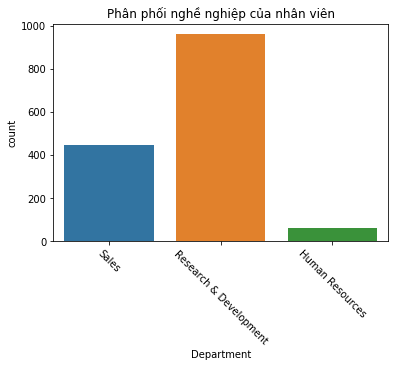

In [82]:
sns.countplot(x='Department', data=new_df).set_title('Phân phối nghề nghiệp của nhân viên');
 
# Rotate x-labels
plt.xticks(rotation=-45)

Chủ yếu họ làm trong mảng R&D: nghiên cứu và phát triển

In [83]:
nghilam_sale= len(new_df[(new_df['Attrition']== 1) & (new_df['Department'] == "Sales")])
nhanvien_sale = len(new_df[new_df['Department'] == "Sales"])
ratio = (nghilam_sale/nhanvien_sale)*100
round(ratio, 2)

20.63

In [84]:
nghilam_rd= len(new_df[(new_df['Attrition']== 1) & (new_df['Department'] == "Research & Development")])
nhanvien_rd = len(new_df[new_df['Department'] == "Research & Development"])
ratio = (nghilam_rd/nhanvien_rd)*100
round(ratio, 2)

13.84

In [85]:
nghilam_hr= len(new_df[(new_df['Attrition']== 1) & (new_df['Department'] == "Human Resources")])
nhanvien_hr = len(new_df[new_df['Department'] == "Human Resources"])
ratio = (nghilam_hr/nhanvien_hr)*100
round(ratio, 2)

19.05

Theo số liệu tỷ lệ người làm trong ngành sale nghỉ nhiều nhất, lên đến **20.63% trong cùng ngành đó** (thứ nhì là mảng HR chiếm tương đương sale, lên đến **19.05%**

## 2f. Overtime V.S. Attrition

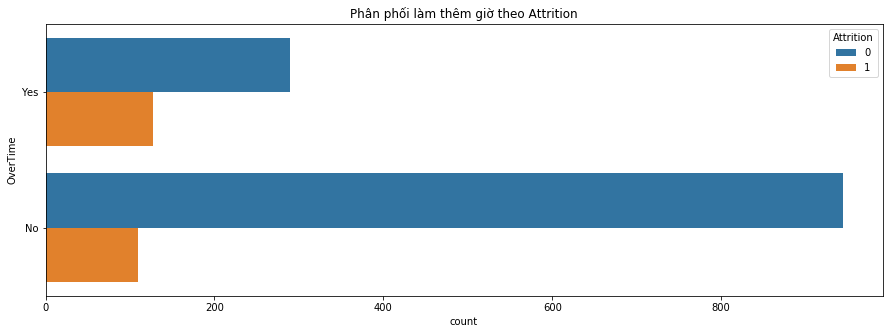

In [86]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="OverTime", hue='Attrition', data=new_df).set_title('Phân phối làm thêm giờ theo Attrition');

Nhìn biểu đồ ta thấy số lượng nhân viên **ra đi** có làm ngoài giờ thì nhiều hơn hẳn so với những người ra đi mà không làm ngoài giờ. Chưa kể xét theo tổng thể của số nhân sự làm/không làm ngoài giờ.

In [87]:
nghilam_co_ot = len(new_df[(new_df['Attrition']== 1) & (new_df['OverTime'] == "Yes")])
nhanvien_ot = len(new_df[new_df['OverTime'] == "Yes"]['OverTime'])
ratio = (nghilam_co_ot/nhanvien_ot)*100
round(ratio, 2)

30.53

In [88]:
nghilam_ko_ot = len(new_df[(new_df["Attrition"]== 1) & (new_df['OverTime']== "No")])
nhanvien_ko_ot= len(new_df[new_df['OverTime'] == "No"])
ratio = (nghilam_ko_ot/nhanvien_ko_ot)*100
round(ratio,2)

10.44

Sau khi dùng các thông tin số liệu tính tỷ lệ ra thì ta có: nhân viên ra đi **có làm OT** chiếm đến **30.53%** so với tổng số người làm OT.<br> 
Còn nhân viên ra đi **không làm OT** chỉ chiếm 10.44% trong tổng số người **không làm OT**

## 2f. Gender V.S. Attrition

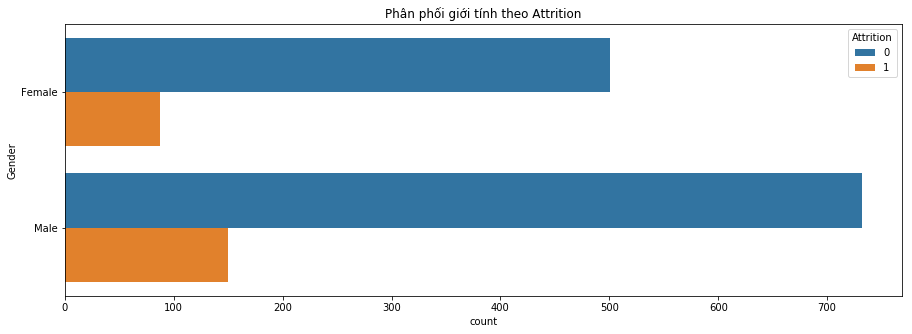

In [89]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Gender", hue='Attrition', data=new_df).set_title('Phân phối giới tính theo Attrition');

In [90]:
nghilam_la_nam = len(new_df[(new_df['Attrition']== 1) & (new_df['Gender']== "Male")])
nhanvien_nam = len(new_df[new_df['Gender'] == "Male"])
ratio = (nghilam_la_nam/nhanvien_nam)*100
round(ratio, 2)

17.01

In [91]:
nghilam_la_nu = len(new_df[(new_df['Attrition']== 1)& (new_df['Gender'] =="Female")])
nhanvien_nu = len(new_df[new_df['Gender']== "Female"])
ratio = (nghilam_la_nu/nhanvien_nu)*100
round(ratio, 2)

14.8

Về giới tính thì nam nghỉ nhiều hơn nữ. Cứ 100 nam thì có 17 người nghỉ. Trong khi ở giới tính là nữ thì ít hơn.

## 2g. Statistical Test for Correlation (Satisfaction)

In [92]:
# Define a dictionary for the target mapping
target_map = {1: "Thấp", 2:"Thấp", 3:"Cao", 4: "Cao"}
# Use the pandas apply method to group into 2 types caregory value
new_df["Satisfaction"] = new_df["Satisfaction"].apply(lambda x: target_map[x])
new_df.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Attrition,Satisfaction,Age,Distance,Gender,Income,Evaluation,OverTime,YearsAtCompany,Department
0,1,Cao,41,1,Female,5993,3,Yes,6,Sales
1,0,Thấp,49,8,Male,5130,4,No,10,Research & Development
2,1,Cao,37,2,Male,2090,3,Yes,0,Research & Development
3,0,Cao,33,3,Female,2909,3,Yes,8,Research & Development
4,0,Thấp,27,2,Male,3468,3,No,2,Research & Development


In [93]:
# Overview of summary (Satisfaction thấp V.S. Satisfaction cao
satisfaction_Summary = new_df.groupby('Satisfaction')
satisfaction_Summary.mean()

,Attrition,Age,Distance,Income,Evaluation,YearsAtCompany
Satisfaction,,,,,,
Cao,0.138735,36.906770,9.220866,6476.540511,3.149834,6.983352
Thấp,0.196837,36.950791,9.147627,6544.720562,3.159930,7.047452


Pop1: những người có độ thỏa mãn cao<br>
Pop2: những người có độ thỏa mãn thấp<br>
Vì đây là 2 mẫu độc lập nên ta dùng **Independent samples t-test**<br>

**Hypothesis Testing 07**: Liệu có sự khác biệt về tuổi tác (Age) giữa người có mức độ thỏa mãn cao và người có mức độ thỏa mãn thấp?

In [94]:
result = stats.ttest_ind(new_df[new_df['Satisfaction'] == "Cao"]['Age'], new_df[new_df['Satisfaction'] == "Thấp"]['Age'])
result

Ttest_indResult(statistic=-0.08995864315506355, pvalue=0.9283323511534929)

In [95]:
compare_pvalue(result) #check

Không có cơ sở để bác bỏ H0. Chấp nhận H0 với mức ý nghĩa 0.9283323511534929


**Kết luận**: Đây không phải là yếu tố đóng vai trò trong satisfaction rate

**Hypothesis Testing 08**: Liệu có sự khác biệt về quảng đường đi làm (Distance) giữa người có mức độ thỏa mãn cao và người có mức độ thỏa mãn thấp?

In [96]:
result = stats.ttest_ind(new_df[new_df['Satisfaction'] == "Cao"]['Distance'], new_df[new_df['Satisfaction'] == "Thấp"]['Distance'])
result

Ttest_indResult(statistic=0.16865587468067636, pvalue=0.8660905622730832)

In [97]:
compare_pvalue(result) #check

Không có cơ sở để bác bỏ H0. Chấp nhận H0 với mức ý nghĩa 0.8660905622730832


**Kết luận**: Đây không phải là yếu tố đóng vai trò trong satisfaction rate

**Hypothesis Testing 09**: Liệu có sự khác biệt về tiền lương (Income) giữa người có mức độ thỏa mãn cao và người có mức độ thỏa mãn thấp?

In [98]:
result = stats.ttest_ind(new_df[new_df['Satisfaction'] == "Cao"]['Income'], new_df[new_df['Satisfaction'] == "Thấp"]['Income'])
result

Ttest_indResult(statistic=-0.270363252837717, pvalue=0.7869188116459493)

In [99]:
compare_pvalue(result)

Không có cơ sở để bác bỏ H0. Chấp nhận H0 với mức ý nghĩa 0.7869188116459493


**Kết luận**: Đây không phải là yếu tố đóng vai trò trong satisfaction rate

**Hypothesis Testing 10**: Liệu có sự khác biệt về thâm niên (YearsAtCompany) giữa người có mức độ thỏa mãn cao và người có mức độ thỏa mãn thấp?

In [100]:
result = stats.ttest_ind(new_df[new_df['Satisfaction'] == "Cao"]['YearsAtCompany'], new_df[new_df['Satisfaction'] == "Thấp"]['YearsAtCompany'])
result

Ttest_indResult(statistic=-0.19532613101943727, pvalue=0.8451646718567182)

In [101]:
compare_pvalue(result)

Không có cơ sở để bác bỏ H0. Chấp nhận H0 với mức ý nghĩa 0.8451646718567182


**Kết luận**: Đây không phải là yếu tố đóng vai trò trong satisfaction rate

# III. Conclusions

Qua các phần đánh giá số liệu ở trên, ta nhận thấy:<br>
- Người muốn ra đi có độ thỏa mãn (satisfaction) thấp hơn người ở lại. (t-test)
- Người muốn ra đi có quãng đường từ nhà đến nơi làm (distance) cao hơn người ở lại. (t-test)
- Người muốn ra đi có lương (income) thấp hơn người ở lại. (t-test)
- Người muốn ra đi có độ tuổi (age) trẻ hơn người ở lại. (t-test)
- Người muốn ra đi có thâm niên (YearsAtCompany) thấp hơn người ở lại. (t-test)
- Không có sự khác biệt giữa mức độ đánh giá năng lực (evaluation) có người muốn ra đi và người ở lại. Với độ tin cậy > 90%.


- Theo số liệu nhân viên làm trong ngành **R&D** là nhiều nhất (visualization). Nhưng số nhân viên nghỉ nhiều nhất rơi vào ngành **sales** chiếm **20.63%** trong cùng ngành, và tiếp theo là ngành **HR**, nhân viên nghỉ chiếm **19.05%** trong cùng ngành. Kết luận: nhóm ngành đối mặt với áp lực dễ ra đi nhất là bên **Sales**
- Những nhân sự hay làm thêm giờ (overtime) thì ra đi nhiều hơn hẳn những người không làm thêm giờ. Những người ra đi có làm OT chiếm đến **30.53%** trong những người làm OT. Trong khi con số này với những người không làm OT chỉ có 10.44%. Kết luận: làm quá nhiều thì nhân viên có xu hướng ra đi.
- Về giới tính, thì nam nghỉ nhiều hơn là nữ. Nam ra đi chiếm **17.01%** so với tổng thể nam. Cứ 100 nam thì 17 người muốn ra đi. Kết luận: nam sẵn sàng ra đi tìm bến đỗ mới hơn là nữ. 
- Về tiền lương thì có mức chênh lệch cao, min **1.009** max **20.000** mode **4.919** (data describe)

Và kết luận từ một số đặc điểm tương quan sau: (Correlation Matrix & Heatmap)
- Nhân viên lớn tuổi thì lương cao hơn.
- Thâm niên cao thì lương cao hơn.
- Nhân viên lớn tuổi gắn bó với công ty hơn.

Ta kết luận những nhân tố đóng vai trò trong:<br>
Độ hụt giảm(Attrition) gồm: Satisfaction, Distance, Income,Age, YearsAtCompany<br>
Độ thỏa mãn(Satisfaction) gồm: Attrition


# IV. References
[Predicting Employee Kernelover](https://www.kaggle.com/randylaosat/predicting-employee-kernelover)<br>
[Data Analysis - Tại sao nhân viên bỏ việc](https://viblo.asia/p/data-analysis-tai-sao-nhan-vien-bo-viec-ByEZkW6gZQ0)